# Data Preparation

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
%matplotlib inline

In [48]:
# Reading dataset and checking head
dataset = pd.read_csv("train_data.csv", delimiter = ",")
pd.set_option('display.max_columns', None)
#dataset.loc[:,'TRUE_BEAUTY'] = 0
#dataset.loc[(dataset.LABEL == 1) & (dataset.PRODUCT_CATEGORY == 'Beauty'), 'TRUE_BEAUTY'] = 1
dataset.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TXT_LENGTH,num_sent,FK_grade_score,stop_count,caps_count,punct_count,emojis,clean_text,acne,also,amazing,back,best,better,bit,bottle,bought,brush,buy,color,cream,day,days,definitely,different,dry,easy,even,every,eye,eyes,face,far,feel,feeling,feels,first,found,get,getting,give,go,going,good,got,great,hair,helps,highly,know,last,less,light,like,little,long,look,looking,looks,lot,love,made,make,makes,many,much,need,never,nice,oil,one,perfect,pretty,price,product,products,put,quality,really,recommend,results,scent,see,serum,shampoo,since,skin,smell,smells,smooth,soft,still,stuff,think,time,tried,try,two,use,used,using,way,well,without,work,works,would,years
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3,1.9,10,2,3,0,least think product save day keep around case ...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4,15.6,28,4,7,0,lithium batteries something new introduced mar...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6,2.6,25,6,8,0,purchased swing baby months pretty much grown ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5,4.0,18,6,4,0,looking inexpensive desk calcolatur works ever...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4,8.3,34,4,6,0,use twice week results great used teeth whiten...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,1,0


In [49]:
df = dataset
df = df.drop(columns = ['DOC_ID','PRODUCT_CATEGORY','PRODUCT_ID','PRODUCT_TITLE','REVIEW_TITLE','REVIEW_TEXT','clean_text'])

from sklearn.model_selection import train_test_split
###################################### Split the Data ######################################
y = df.LABEL
del df['LABEL']
x = df


x.loc[x.VERIFIED_PURCHASE == 'Y', 'VERIFIED_PURCHASE'] = 1
x.loc[x.VERIFIED_PURCHASE != 1, 'VERIFIED_PURCHASE'] = 0

x = x.fillna(0)

x_train, x_split, y_train, y_split = train_test_split(x, y, test_size = 0.4)

x_val, x_test, y_val, y_test = train_test_split(x_split, y_split, test_size = 0.5)

In [35]:
x_train.head(5)

,RATING,VERIFIED_PURCHASE,TXT_LENGTH,num_sent,FK_grade_score,stop_count,caps_count,punct_count,emojis,acne,also,amazing,back,best,better,bit,bottle,bought,brush,buy,color,cream,day,days,definitely,different,dry,easy,even,every,eye,eyes,face,far,feel,feeling,feels,first,found,get,getting,give,go,going,good,got,great,hair,helps,highly,know,last,less,light,like,little,long,look,looking,looks,lot,love,made,make,makes,many,much,need,never,nice,oil,one,perfect,pretty,price,product,products,put,quality,really,recommend,results,scent,see,serum,shampoo,since,skin,smell,smells,smooth,soft,still,stuff,think,time,tried,try,two,use,used,using,way,well,without,work,works,would,years
3529,4,0,279,4,4.0,26,5,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17080,5,1,414,7,5.9,33,8,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19704,4,1,492,7,7.1,41,8,19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10753,3,0,4039,27,13.1,236,159,203,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
10554,4,0,1423,24,15.9,90,56,124,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,5,0,0,0,0,0,1,1,1,0,1,0,0,2,0,0,2,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,1,0,0,1,0,1,0


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
############################# See Performance of DT's of different depths ####################################
choices = pd.DataFrame(
    [i, 
     accuracy_score(
         DecisionTreeClassifier(criterion = "gini", max_depth=i, min_impurity_decrease = 0)
         .fit(X = x_train, y = y_train)
         .predict(x_val), 
                    y_val)] for i in range(2,10,1)
)
choices.columns = ['level','accuracy']

choices

,level,accuracy
0,2,0.788095
1,3,0.793571
2,4,0.798810
3,5,0.798333
4,6,0.794762
5,7,0.792857
6,8,0.795000
7,9,0.787143


In [ ]:
?xgb.XGBClassifier

In [37]:
########################### Gradient Boosting ####################################
from sklearn.ensemble import GradientBoostingClassifier
choices = pd.DataFrame(
    [i, 
     accuracy_score(
         GradientBoostingClassifier(criterion = "friedman_mse", max_depth=i, min_impurity_decrease = 0.1)
         .fit(X = x_train, y = y_train)
         .predict(x_val), 
                    y_val)] for i in range(3,10,1)
)
choices.columns = ['level','accuracy']
#GradientBoostingClassifier(criterion = "friedman_mse", max_depth=4, min_impurity_decrease = 0.1)
choices

,level,accuracy
0,3,0.804286
1,4,0.804524
2,5,0.804286
3,6,0.803333
4,7,0.805238
5,8,0.804048
6,9,0.796905


In [132]:
########################### XG Boosting ####################################
import xgboost as xgb
choices = pd.DataFrame(
    [i, 
     accuracy_score(
         xgb.XGBClassifier(max_depth=i, learning_rate = 0.2)
         .fit(X = x_train, y = y_train)
         .predict(x_val), 
                    y_val)] for i in range(2,8,1)
)
choices.columns = ['level','accuracy']
#xgb.XGBClassifier(max_depth=5, learning_rate = 0.2)
choices

,level,accuracy
0,2,0.805952
1,3,0.806429
2,4,0.805238
3,5,0.803810
4,6,0.803333
5,7,0.800952


In [100]:
?xgb.XGBClassifier

In [38]:
########################### Random Forest ####################################
from sklearn.ensemble import RandomForestClassifier
choices = pd.DataFrame(
    [i, 
     accuracy_score(
         RandomForestClassifier(n_estimators = i, max_depth=6, min_impurity_decrease = 0)
         .fit(X = x_train, y = y_train)
         .predict(x_val), 
                    y_val)] for i in range(400,800,50)
)
choices.columns = ['level','accuracy']

choices

,level,accuracy
0,400,0.800476
1,450,0.798333
2,500,0.800238
3,550,0.798571
4,600,0.799286
5,650,0.798333
6,700,0.797619
7,750,0.797619


In [39]:
########################### Logistic Forest ####################################
from sklearn.linear_model import LogisticRegression

choices = pd.DataFrame(
    [i/10, 
     accuracy_score(
         LogisticRegression(penalty='l2',C = i/10)
         .fit(X = x_train, y = y_train)
         .predict(x_val), 
                    y_val)] for i in range(1,20,2)
)
choices.columns = ['level','accuracy']
#LogisticRegression(penalty='l2',C = 1)
choices

,level,accuracy
0,0.1,0.798810
1,0.3,0.795714
2,0.5,0.799524
3,0.7,0.799524
4,0.9,0.799762
5,1.1,0.792381
6,1.3,0.798333
7,1.5,0.788810
8,1.7,0.797619
9,1.9,0.798095


10-fold cross validation:

ROC AUC: 0.86 (+/- 0.03) [Gradient Boost]
ROC AUC: 0.85 (+/- 0.04) [Random Forest]
ROC AUC: 0.85 (+/- 0.04) [Logistic]


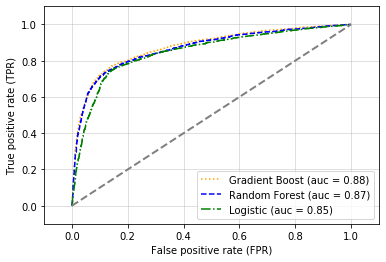

In [44]:
################### Part D ####################
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score

######################################## Classifiers ########################################

# Gradient Boosting Classifier
clf1 = GradientBoostingClassifier(criterion = "friedman_mse", max_depth=4, min_impurity_decrease = 0.1)

# Random Forest Classifier
clf2 = RandomForestClassifier(n_estimators = 500, max_depth=6, min_impurity_decrease = 0)

# Logistic Classifier
clf3 = LogisticRegression(penalty='l2',C = 1)

# Label the classifiers
clf_labels = ['Gradient Boost', 'Random Forest', 'Logistic']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=x,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)
colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

Confusion matrix, without normalization
[[1874  248]
 [ 517 1561]]


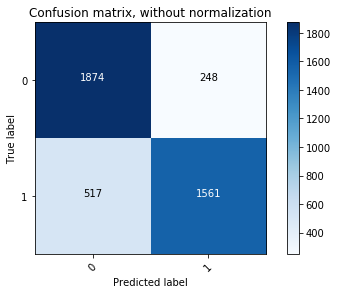

The accuracy is 0.8178571428571428
The F1 score is 0.8168399086742009
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      2122
           1       0.86      0.75      0.80      2078

    accuracy                           0.82      4200
   macro avg       0.82      0.82      0.82      4200
weighted avg       0.82      0.82      0.82      4200



In [60]:
#paytree = LogisticRegression(penalty='l2',C = 1)
#paytree = RandomForestClassifier(n_estimators = 30, max_depth=12, min_impurity_decrease = 0)
paytree = GradientBoostingClassifier(criterion = "friedman_mse", max_depth=4, min_impurity_decrease = 0.1)
#paytree = DecisionTreeClassifier(criterion = "gini", max_depth=5, min_impurity_decrease = 0.01)
payfit = paytree.fit(x_train, y_train)
y_pred = payfit.predict(x_test)

import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

    
#cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0","1"],
                      title='Confusion matrix, without normalization')

plt.show()

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, target_names=('0','1')))

In [66]:
(1874+517)/(1874+517+248+1561)

0.5692857142857143

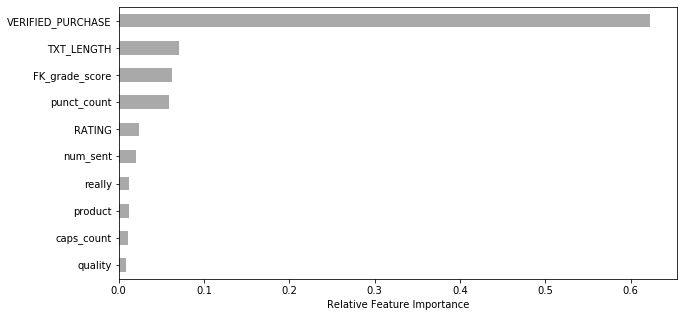

In [63]:
feat_importances = pd.Series(payfit.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance');

In [6]:
test = pd.read_csv("test_data_new.csv", delimiter = ",")
test.head(1)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,TXT_LENGTH,num_sent,FK_grade_score,stop_count,caps_count,punct_count,emojis,clean_text,acne,also,amazing,back,best,better,bit,bottle,bought,brush,buy,color,cream,day,days,definitely,different,dry,easy,even,every,eye,eyes,face,far,feel,feeling,feels,first,found,get,getting,give,go,going,good,got,great,hair,helps,highly,know,last,less,light,like,little,long,look,looking,looks,lot,love,made,make,makes,many,much,need,never,nice,oil,one,perfect,pretty,price,product,products,put,quality,really,recommend,results,scent,see,serum,shampoo,since,skin,smell,smells,smooth,soft,still,stuff,think,time,tried,try,two,use,used,using,way,well,without,work,works,would,years
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1.276560e+09,NaN,NaN,224.0,4.0,16.9,17.0,4.0,9.0,0.0,bought two fl oz hand cream neither dispensers...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
test1 = test.drop(columns = ['vote','reviewTime','reviewerID','asin','reviewerName','reviewText','summary',
                            'unixReviewTime','style','image', 'clean_text'])
test1.head(2)

,overall,verified,TXT_LENGTH,num_sent,FK_grade_score,stop_count,caps_count,punct_count,emojis,acne,also,amazing,back,best,better,bit,bottle,bought,brush,buy,color,cream,day,days,definitely,different,dry,easy,even,every,eye,eyes,face,far,feel,feeling,feels,first,found,get,getting,give,go,going,good,got,great,hair,helps,highly,know,last,less,light,like,little,long,look,looking,looks,lot,love,made,make,makes,many,much,need,never,nice,oil,one,perfect,pretty,price,product,products,put,quality,really,recommend,results,scent,see,serum,shampoo,since,skin,smell,smells,smooth,soft,still,stuff,think,time,tried,try,two,use,used,using,way,well,without,work,works,would,years
0,2.0,True,224.0,4.0,16.9,17.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5.0,True,519.0,9.0,4.3,44.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
test1.rename(columns={'overall':'RATING', 'verified':'VERIFIED_PURCHASE'}, inplace=True)
test1.RATING.value_counts(dropna = False)

5.0    381563
4.0     70410
1.0     50435
3.0     41938
2.0     29483
Name: RATING, dtype: int64

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
test1['fake'] = GradientBoostingClassifier(criterion = "friedman_mse", max_depth=4, min_impurity_decrease = 0.1).fit(X = x_train, y = y_train).predict(test1)

In [17]:
cols = test.loc[:,['reviewerID','asin']]
fakepreds = pd.concat([test1.reset_index(drop=True), cols], axis=1)

In [18]:
fakepreds.head()

,RATING,VERIFIED_PURCHASE,TXT_LENGTH,num_sent,FK_grade_score,stop_count,caps_count,punct_count,emojis,acne,also,amazing,back,best,better,bit,bottle,bought,brush,buy,color,cream,day,days,definitely,different,dry,easy,even,every,eye,eyes,face,far,feel,feeling,feels,first,found,get,getting,give,go,going,good,got,great,hair,helps,highly,know,last,less,light,like,little,long,look,looking,looks,lot,love,made,make,makes,many,much,need,never,nice,oil,one,perfect,pretty,price,product,products,put,quality,really,recommend,results,scent,see,serum,shampoo,since,skin,smell,smells,smooth,soft,still,stuff,think,time,tried,try,two,use,used,using,way,well,without,work,works,would,years,fake,reviewerID,asin
0,2.0,True,224.0,4.0,16.9,17.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,A1Q6MUU0B2ZDQG,B00004U9V2
1,5.0,True,519.0,9.0,4.3,44.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,A3HO2SQDCZIE9S,B00004U9V2
2,5.0,True,17.0,1.0,0.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A2EM03F99X3RJZ,B00004U9V2
3,5.0,True,54.0,1.0,3.3,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A3Z74TDRGD0HU,B00004U9V2
4,5.0,True,55.0,3.0,-0.8,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,A2UXFNW9RTL4VM,B00004U9V2


In [19]:
#fakepreds.to_csv('fake_beauty.csv')

In [155]:
test1.fake.value_counts()

0    466208
1    107621
Name: fake, dtype: int64